# DataFrame的增删改查

特征工程中，删除列，增加1列

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2=pd.DataFrame({
    'key1':['a', 'a', 'b', 'b', 'a'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1':np.random.randn(5),
    'data2':np.random.randn(5)
})

In [10]:
df2

,data1,data2,key1,key2
0,0.085832,-0.900550,a,one
1,-2.374867,-0.382366,a,two
2,0.881411,0.176191,b,one
3,0.503483,0.407859,b,two
4,0.102710,-0.764255,a,one


In [3]:
df2.iloc[0]

data1    0.0858323
data2     -0.90055
key1             a
key2           one
Name: 0, dtype: object

In [4]:
df2.loc[0]

data1    0.0858323
data2     -0.90055
key1             a
key2           one
Name: 0, dtype: object

In [7]:
df2.groupby(['key1']).count()

,data1,data2,key2
key1,,,
a,3,3,3
b,2,2,2


In [8]:
df2.groupby(['key1']).count().iloc[0]

data1    3
data2    3
key2     3
Name: a, dtype: int64

In [9]:
df2.groupby(['key1']).count().loc['a']

data1    3
data2    3
key2     3
Name: a, dtype: int64

## 使用iloc获取dataFrame的某行某列

In [13]:
df2.iloc[0,0]

0.085832322031443933

In [14]:
df2.iloc[:,0]

0    0.085832
1   -2.374867
2    0.881411
3    0.503483
4    0.102710
Name: data1, dtype: float64

In [15]:
df2.iloc[:,2] # Array slice

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [17]:
df2.iloc[0:-1]

,data1,data2,key1,key2
0,0.085832,-0.900550,a,one
1,-2.374867,-0.382366,a,two
2,0.881411,0.176191,b,one
3,0.503483,0.407859,b,two


打印前2行，后2列

数据筛选，子表提取

In [26]:
df2.iloc[:2, -2:]

,key2,data
0,one,NaN
1,two,2.0


## 数据的修改

#### .at()

修改那个位置

In [22]:
df2.at[1, 'data1']=2

In [23]:
df2

,data1,data2,key1,key2,data
0,0.085832,-0.900550,a,one,NaN
1,2.000000,-0.382366,a,two,2.0
2,0.881411,0.176191,b,one,NaN
3,0.503483,0.407859,b,two,NaN
4,0.102710,-0.764255,a,one,NaN


#### .iat()

In [24]:
df2.iat[1, 1]=-2

In [25]:
df2

,data1,data2,key1,key2,data
0,0.085832,-0.900550,a,one,NaN
1,2.000000,-2.000000,a,two,2.0
2,0.881411,0.176191,b,one,NaN
3,0.503483,0.407859,b,two,NaN
4,0.102710,-0.764255,a,one,NaN


## 增加行

对于dataframe，每1行实际上代表一个对象向量

对于对象/向量的表示。使用json

会用即可

In [28]:
df3 = df2.append({'data1':1.2, 'data2':3.8, 'key1':'b', 'key2':'two'}, ignore_index=True) # 返回子表，原表不变

In [29]:
df3

,data1,data2,key1,key2,data
0,0.085832,-0.900550,a,one,NaN
1,2.000000,-2.000000,a,two,2.0
2,0.881411,0.176191,b,one,NaN
3,0.503483,0.407859,b,two,NaN
4,0.102710,-0.764255,a,one,NaN
5,1.200000,3.800000,b,two,NaN


#### 第2中方法，增加行

In [43]:
# 不多不少，直接改变
df2.loc[7]=[2,3,'a','three',2]

In [50]:
df2

,data1,data2,key1,key2,data
0,0.085832,-0.900550,a,one,NaN
1,2.000000,-2.000000,a,two,2.0
2,0.881411,0.176191,b,one,NaN
3,0.503483,0.407859,b,two,NaN
4,0.102710,-0.764255,a,one,NaN
5,2.000000,3.000000,a,three,2.0
6,2.000000,3.000000,a,three,2.0
7,2.000000,3.000000,a,three,2.0


## 增加列

.assign()

同一个属性，hash表

In [46]:
df4=df3.assign(key3=[1,2,3,4,5,6])

In [47]:
df4

,data1,data2,key1,key2,data,key4,key3
0,0.085832,-0.900550,a,one,NaN,6,1
1,2.000000,-2.000000,a,two,2.0,7,2
2,0.881411,0.176191,b,one,NaN,8,3
3,0.503483,0.407859,b,two,NaN,9,4
4,0.102710,-0.764255,a,one,NaN,10,5
5,1.200000,3.800000,b,two,NaN,11,6


In [36]:
df3.loc[:, 'key4']=[6,7,8,9,10,11] # 本身被改变

In [49]:
df3

,data1,data2,key1,key2,data,key4
0,0.085832,-0.900550,a,one,NaN,6
1,2.000000,-2.000000,a,two,2.0,7
2,0.881411,0.176191,b,one,NaN,8
3,0.503483,0.407859,b,two,NaN,9
4,0.102710,-0.764255,a,one,NaN,10
5,1.200000,3.800000,b,two,NaN,11


## 核密度估计（Kernel Density Estimation）

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

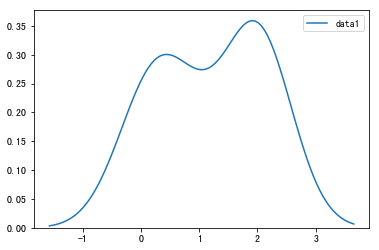

In [52]:
sns.kdeplot(df2['data1'])

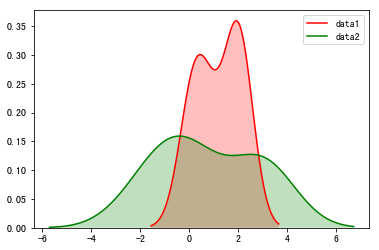

In [54]:
sns.kdeplot(df2['data1'],shade=True,color='r')
sns.kdeplot(df2['data2'],shade=True,color='g')

## 生成一段数据，并进行核密度估计

In [66]:
x = np.random.rand(5000)

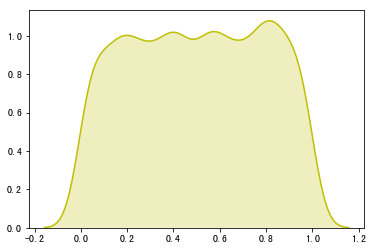

In [67]:
sns.kdeplot(x,shade=True, color='y')